In [1]:
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt
import pickle
import sys 

sys.path.append('../util/')

import ML_MJO_util as mjo
%load_ext autoreload
%autoreload 2

In [2]:
fn_ref = './filter_hidden_forecasts/predicted_MCDO_UNET_olr20deg_RMMERA5_1modesoff_wnx1off_lead15_dailyinput_c51_mem1dnew.nc'
fn_flt = './filter_hidden_forecasts/flthid_predicted_MCDO_UNET_olr20deg_RMMERA5_1modesoff_wnx1off_lead15_dailyinput_c51_mem1dnew.nc'

ds_ref = xr.open_dataset(fn_ref)
ds_flt = xr.open_dataset(fn_flt)

In [2]:
def get_1var_skill_one(mjo_ind, fn, rule='Iamp>1.0', winter=False):

    ds = xr.open_dataset(fn)
    datesta = ds.time[0].values
    dateend = ds.time[-1].values
    phase, amp = mjo.get_phase_amp(mjo_ind, datesta, dateend, winter=winter)
    ds['iphase'] = xr.DataArray(phase, dims=['time'], attrs={'long_name': 'initial phase of MJO'})
    ds['iamp'] = xr.DataArray(amp, dims=['time'], attrs={'long_name': 'initial amplitude of MJO'})
    
    if rule == 'Iamp>1.0':
        ds_sel = ds.where(ds.iamp>1.0, drop=True)
    elif rule == 'DJFM':
        ds_sel = ds.where(ds.time.dt.month.isin([12,1,2,3]), drop=True)
    elif rule == 'DJFM+Iamp>1.0':
        ds_sel = ds.where(ds.time.dt.month.isin([12,1,2,3]), drop=True)
        ds_sel = ds_sel.where(ds_sel.iamp>1.0, drop=True)
    elif rule == '1-1.5':
        ds_sel = ds.where(ds.time.dt.month.isin([10,11,12,1,2,3]), drop=True)
        ds_sel = ds_sel.where(ds_sel.iamp>1.0, drop=True)
        ds_sel = ds_sel.where(ds_sel.iamp<=1.5, drop=True)
    elif rule == '1.5-2':
        ds_sel = ds.where(ds.time.dt.month.isin([10,11,12,1,2,3]), drop=True)
        ds_sel = ds_sel.where(ds_sel.iamp>1.5, drop=True)
        ds_sel = ds_sel.where(ds_sel.iamp<=2.0, drop=True)
    elif rule == '2-4':
        ds_sel = ds.where(ds.time.dt.month.isin([10,11,12,1,2,3]), drop=True)
        ds_sel = ds_sel.where(ds_sel.iamp>2.0, drop=True)
    elif rule == '0-1':
        ds_sel = ds.where(ds.time.dt.month.isin([10,11,12,1,2,3]), drop=True)
        ds_sel = ds_sel.where(ds_sel.iamp<1.0, drop=True)
    elif rule == 'None':
        ds_sel = ds

    bcc = mjo.bulk_bcc(ds_sel[mjo_ind+'p'], ds_sel[mjo_ind+'t'])
    rmse = mjo.bulk_rmse(ds_sel[mjo_ind+'p'], ds_sel[mjo_ind+'t'])

    return bcc, rmse


In [7]:
fn_flt = '/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_yproj_xfft_4gpus_new/hidden_analysis/flt_hid26_relu_predicted_MCDO_UNET_olr20deg_RMMERA5_1modesoff_wnx1off_lead15_mcut3kcut2_allall.nc'
bcc_flt, rmse_flt = get_1var_skill_one('RMM', fn_flt, rule='Iamp>1.0')

print('bcc_flt:', bcc_flt)

bcc_flt: <xarray.DataArray ()>
array(0.2589326)
Coordinates:
    time     datetime64[ns] 2019-12-25


In [8]:
fn_flt = '/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_yproj_xfft_4gpus_new/hidden_analysis/flt_hid26_relu_predicted_MCDO_UNET_olr20deg_RMMERA5_1modesoff_wnx1off_lead15_mcut3kcut2_resiresi.nc'
bcc_flt, rmse_flt = get_1var_skill_one('RMM', fn_flt, rule='Iamp>1.0')

print('bcc_flt:', bcc_flt)

bcc_flt: <xarray.DataArray ()>
array(0.21335919)
Coordinates:
    time     datetime64[ns] 2019-12-25


In [4]:
fn_flt = '/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_yproj_xfft_4gpus_new/hidden_analysis/flt_hid26_relu_predicted_MCDO_UNET_olr20deg_RMMERA5_1modesoff_wnx1off_lead15_mcut10kcut9_allall.nc'
bcc_flt, rmse_flt = get_1var_skill_one('RMM', fn_flt, rule='Iamp>1.0')

print('bcc_flt:', bcc_flt)

bcc_flt: <xarray.DataArray ()>
array(0.49997182)
Coordinates:
    time     datetime64[ns] 2019-12-25


In [6]:
fn_flt = '/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_yproj_xfft_4gpus_new/hidden_analysis/flt_hid26_relu_predicted_MCDO_UNET_olr20deg_RMMERA5_1modesoff_wnx1off_lead15_mcut10kcut9_resiresi.nc'
bcc_flt, rmse_flt = get_1var_skill_one('RMM', fn_flt, rule='Iamp>1.0')

print('bcc_flt:', bcc_flt)

bcc_flt: <xarray.DataArray ()>
array(0.06654539)
Coordinates:
    time     datetime64[ns] 2019-12-25


In [5]:
fn_flt = '/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_yproj_xfft_4gpus_new/hidden_analysis/flt_hid26_predicted_MCDO_UNET_olr20deg_RMMERA5_1modesoff_wnx1off_lead15_mcut10kcut9_allall.nc'
bcc_flt, rmse_flt = get_1var_skill_one('RMM', fn_flt, rule='Iamp>1.0')

print('bcc_flt:', bcc_flt)

bcc_flt: <xarray.DataArray ()>
array(0.16282225)
Coordinates:
    time     datetime64[ns] 2019-12-25


In [3]:
fn_flt = '/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_yproj_xfft_4gpus_new/hidden_analysis/flt_hid26_predicted_MCDO_UNET_olr20deg_RMMERA5_1modesoff_wnx1off_lead15_mcut10kcut9_resiresi.nc'
bcc_flt, rmse_flt = get_1var_skill_one('RMM', fn_flt, rule='Iamp>1.0')

print('bcc_flt:', bcc_flt)

bcc_flt: <xarray.DataArray ()>
array(0.12297362)
Coordinates:
    time     datetime64[ns] 2019-12-25


In [4]:
bcc_ref, rmse_ref = get_1var_skill_one('RMM', fn_ref, rule='Iamp>1.0')
bcc_flt, rmse_flt = get_1var_skill_one('RMM', fn_flt, rule='Iamp>1.0')

print('bcc_ref:', bcc_ref)
print('bcc_flt:', bcc_flt)


bcc_ref: <xarray.DataArray ()>
array(0.51733527)
Coordinates:
    time     datetime64[ns] 2019-12-25
bcc_flt: <xarray.DataArray ()>
array(0.5083786)
Coordinates:
    time     datetime64[ns] 2019-12-25


In [5]:
bcc_ref_list = []
bcc_flt_list = []
rmse_ref_list = []
rmse_flt_list = []

for lead in np.arange(0, 35, 5):
    fn_ref = './filter_hidden_forecasts/predicted_MCDO_UNET_olr20deg_RMMERA5_1modesoff_wnx1off_lead'+str(lead)+'_dailyinput_c51_mem1dnew.nc'
    fn_flt = './filter_hidden_forecasts/flthid_predicted_MCDO_UNET_olr20deg_RMMERA5_1modesoff_wnx1off_lead'+str(lead)+'_dailyinput_c51_mem1dnew.nc'
    bcc_ref, rmse_ref = get_1var_skill_one('RMM', fn_ref, rule='Iamp>1.0')
    bcc_flt, rmse_flt = get_1var_skill_one('RMM', fn_flt, rule='Iamp>1.0')

    bcc_ref_list.append(bcc_ref.values)
    bcc_flt_list.append(bcc_flt.values)
    rmse_ref_list.append(rmse_ref.values)
    rmse_flt_list.append(rmse_flt.values)


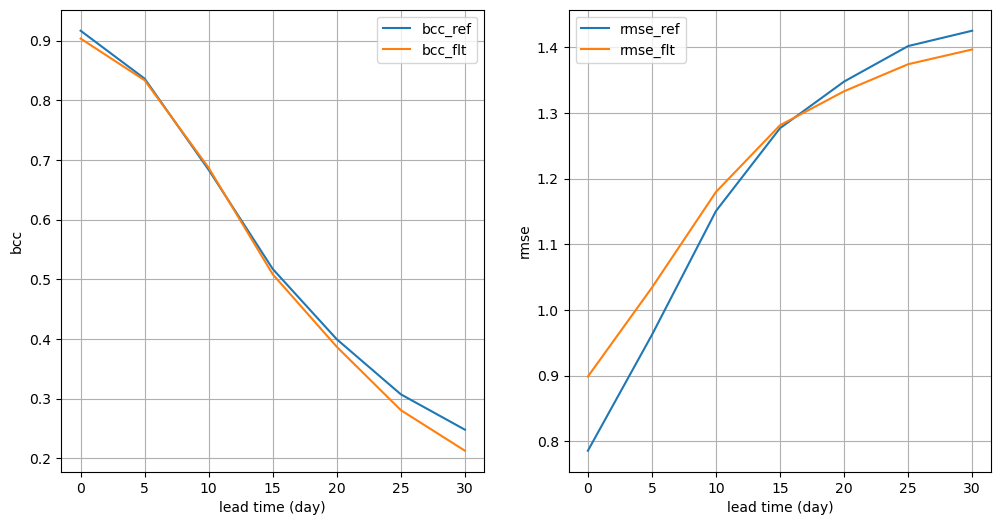

In [7]:
# convert list to numpy array
bcc_ref_list = np.array(bcc_ref_list)
bcc_flt_list = np.array(bcc_flt_list)
rmse_ref_list = np.array(rmse_ref_list)
rmse_flt_list = np.array(rmse_flt_list)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, 35, 5), bcc_ref_list, label='bcc_ref')
plt.plot(np.arange(0, 35, 5), bcc_flt_list, label='bcc_flt')
plt.legend()
plt.xlabel('lead time (day)')
plt.ylabel('bcc')
plt.grid(visible=True)

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, 35, 5), rmse_ref_list, label='rmse_ref')
plt.plot(np.arange(0, 35, 5), rmse_flt_list, label='rmse_flt')
plt.legend()
plt.xlabel('lead time (day)')
plt.ylabel('rmse')
plt.grid(visible=True)

plt.show()